In [27]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
data_dir = '../../results/data/experiment2'
df = None
# Load data
for file in os.listdir(data_dir):
    if not file.endswith('.csv'):
        continue
    if df is None:
        df = pd.read_csv(f'{data_dir}/{file}')
    else:
        df = pd.concat([df, pd.read_csv(f'{data_dir}/{file}')])

filtered_df = df[(df['region'] == 'Avg') & (df['score_type'] == 'f1')]
# df = pd.read_csv(f'{data_dir}/709551_set1_entropy_bb-True_default.csv')

In [6]:
df

,iteration,region,score_type,score,subject_id,labelset,uncertainty_measure,background_bias,guidance,feature,bb_flipped_fg_frac
0,0,Other,precision,0.935932,677968,set1,ground-truth,True,log,default,0.305143
1,0,Other,recall,0.625121,677968,set1,ground-truth,True,log,default,0.305143
2,0,Other,f1,0.749587,677968,set1,ground-truth,True,log,default,0.305143
3,0,CG,precision,0.311574,677968,set1,ground-truth,True,log,default,0.305143
4,0,CG,recall,0.669548,677968,set1,ground-truth,True,log,default,0.305143
...,...,...,...,...,...,...,...,...,...,...,...
259,10,SLF,right_recall,0.923211,987983,set2,random,True,log,default,0.026818
260,10,SLF,right_f1,0.745814,987983,set2,random,True,log,default,0.026818
261,10,Avg,prec,0.591810,987983,set2,random,True,log,default,0.026818
262,10,Avg,recall,0.825297,987983,set2,random,True,log,default,0.026818


In [17]:
filtered_df[(filtered_df['uncertainty_measure'] == 'entropy') & (filtered_df['iteration'] == 5)]

,iteration,region,score_type,score,subject_id,labelset,uncertainty_measure,background_bias,guidance,feature,bb_flipped_fg_frac
107,5,Avg,f1,0.543908,677968,set1,entropy,True,log,default,0.070378
143,5,Avg,f1,0.554946,677968,set2,entropy,True,log,default,0.265017
107,5,Avg,f1,0.545173,705341,set1,entropy,True,log,default,0.051739
143,5,Avg,f1,0.535159,705341,set2,entropy,True,log,default,0.238937
107,5,Avg,f1,0.591198,709551,set1,entropy,True,log,default,0.051626
143,5,Avg,f1,0.583117,709551,set2,entropy,True,log,default,0.184818
107,5,Avg,f1,0.548599,729557,set1,entropy,True,log,default,0.122184
143,5,Avg,f1,0.568820,729557,set2,entropy,True,log,default,0.254690
107,5,Avg,f1,0.537785,770352,set1,entropy,True,log,default,0.122044
143,5,Avg,f1,0.515852,770352,set2,entropy,True,log,default,0.277332


In [14]:
filtered_df[(filtered_df['subject_id'] == 987983) & (filtered_df['iteration'] == 5)]

,iteration,region,score_type,score,subject_id,labelset,uncertainty_measure,background_bias,guidance,feature,bb_flipped_fg_frac
107,5,Avg,f1,0.658691,987983,set1,ground-truth,True,log,default,0.135785
107,5,Avg,f1,0.574288,987983,set1,random,True,log,default,0.010994
107,5,Avg,f1,0.587071,987983,set1,entropy,True,log,default,0.055716
143,5,Avg,f1,0.590139,987983,set2,entropy,True,log,default,0.154611
143,5,Avg,f1,0.651066,987983,set2,ground-truth,True,log,default,0.219585
143,5,Avg,f1,0.648734,987983,set2,random,True,log,default,0.039844


In [18]:
filtered_df['uncertainty_measure_feature'] = filtered_df['uncertainty_measure'] + '_' + filtered_df['feature']

/tmp/ipykernel_1445749/2400159290.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['uncertainty_measure_feature'] = filtered_df['uncertainty_measure'] + '_' + filtered_df['feature']


In [19]:
filtered_df['uncertainty_measure_feature']

17     ground-truth_default
35     ground-truth_default
53     ground-truth_default
71     ground-truth_default
89     ground-truth_default
               ...         
167             entropy_tta
191             entropy_tta
215             entropy_tta
239             entropy_tta
263             entropy_tta
Name: uncertainty_measure_feature, Length: 583, dtype: object

['set1' 'set2']


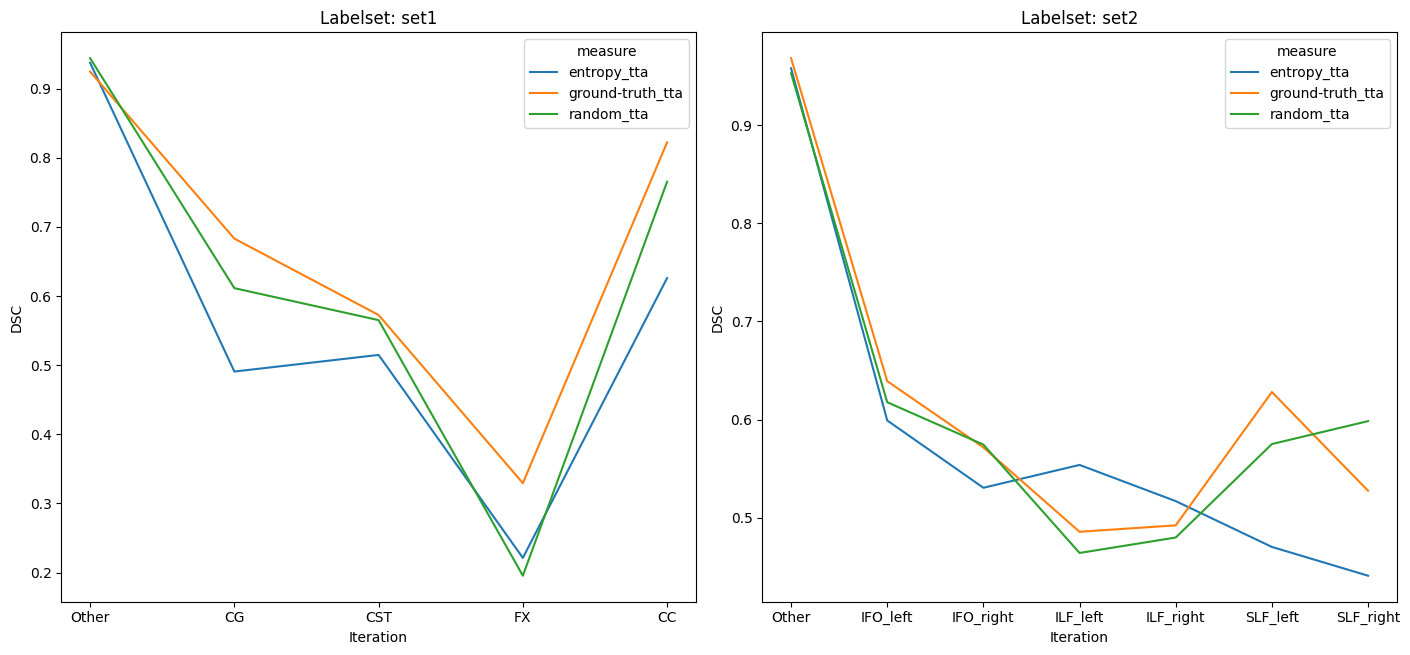

In [80]:
df['uncertainty_measure_feature'] = df['uncertainty_measure'] + '_' + df['feature']

# filtered_df = df[
#     (df['iteration'] == 5) & 
#     # (df['region'] == 'Avg') & 
#     (df['score_type'] == 'f1') & 
#     (df['iteration'] < 6) &
#     (df['feature'].str.contains('tta'))
# ]


filtered_df = df[
    # (df['iteration'] == 5) & 
    # (df['region'] == 'Avg') & 
    (df['subject_id'] == 987983) &
    (df['score_type'] == 'precision') & 
    (df['iteration'] == 1) &
    (df['feature'].str.contains('tta')) 
    # (df['labelset'] == 'set2')
]
#&('tta' in df['feature'])
# Get unique labelsets
labelsets = filtered_df['labelset'].unique()
print(labelsets)
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(15, 7), sharey=False)

for ax, labelset in zip(axes, labelsets):
    subset = filtered_df[filtered_df['labelset'] == labelset]
    
    # Create boxplot
    sns.lineplot(
        data=subset,
        x='region',
        y='score',
        hue='uncertainty_measure_feature',
        ax=ax,
        # errorbar='ci'
    )
    ax.set_title(f'Labelset: {labelset}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('DSC')
    ax.legend(title='measure') #, loc='auto')


# Set common x-axis label
# fig.text(0.5, 0.04, 'Iteration', ha='center')

# Add a legend
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right', title='Background Bias')

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# fig.savefig(f'{data_dir}/experiment2_set2.png')

In [60]:
filtered_df = df[
    # (df['iteration'] == 5) & 
    # (df['region'] == 'Avg') & 
    (df['subject_id'] == 987983) &
    (df['score_type'] == 'f1') & 
    (df['iteration'] < 6) &
    (df['feature'].str.contains('tta')) &
    (df['labelset'] == 'set2')
]

In [61]:
filtered_df

,iteration,region,score_type,score,subject_id,labelset,uncertainty_measure,background_bias,guidance,feature,bb_flipped_fg_frac
2,0,Other,f1,0.557874,987983,set2,entropy,True,log,tta,0.323946
23,0,Avg,f1,0.506323,987983,set2,entropy,True,log,tta,0.323946
26,1,Other,f1,0.637893,987983,set2,entropy,True,log,tta,0.244683
47,1,Avg,f1,0.607333,987983,set2,entropy,True,log,tta,0.244683
50,2,Other,f1,0.694643,987983,set2,entropy,True,log,tta,0.140041
...,...,...,...,...,...,...,...,...,...,...,...
131,5,ILF_left,f1,0.637747,987983,set2,random,True,log,tta,0.021545
134,5,ILF_right,f1,0.660481,987983,set2,random,True,log,tta,0.021545
137,5,SLF_left,f1,0.734493,987983,set2,random,True,log,tta,0.021545
140,5,SLF_right,f1,0.792441,987983,set2,random,True,log,tta,0.021545


In [19]:
filtered_df[(filtered_df['subject_id'] == 782561) & (filtered_df['iteration'] == 2)]

,iteration,region,score_type,score,subject_id,labelset,uncertainty_measure,background_bias,guidance,feature,bb_flipped_fg_frac
53,2,Avg,f1,0.531104,782561,set1,entropy,False,log,default,0.000000
53,2,Avg,f1,0.531441,782561,set1,entropy,True,log,default,0.096322
71,2,Avg,f1,0.511856,782561,set2,entropy,False,log,default,0.000000
71,2,Avg,f1,0.520321,782561,set2,entropy,True,log,default,0.390691


['set1' 'set2']


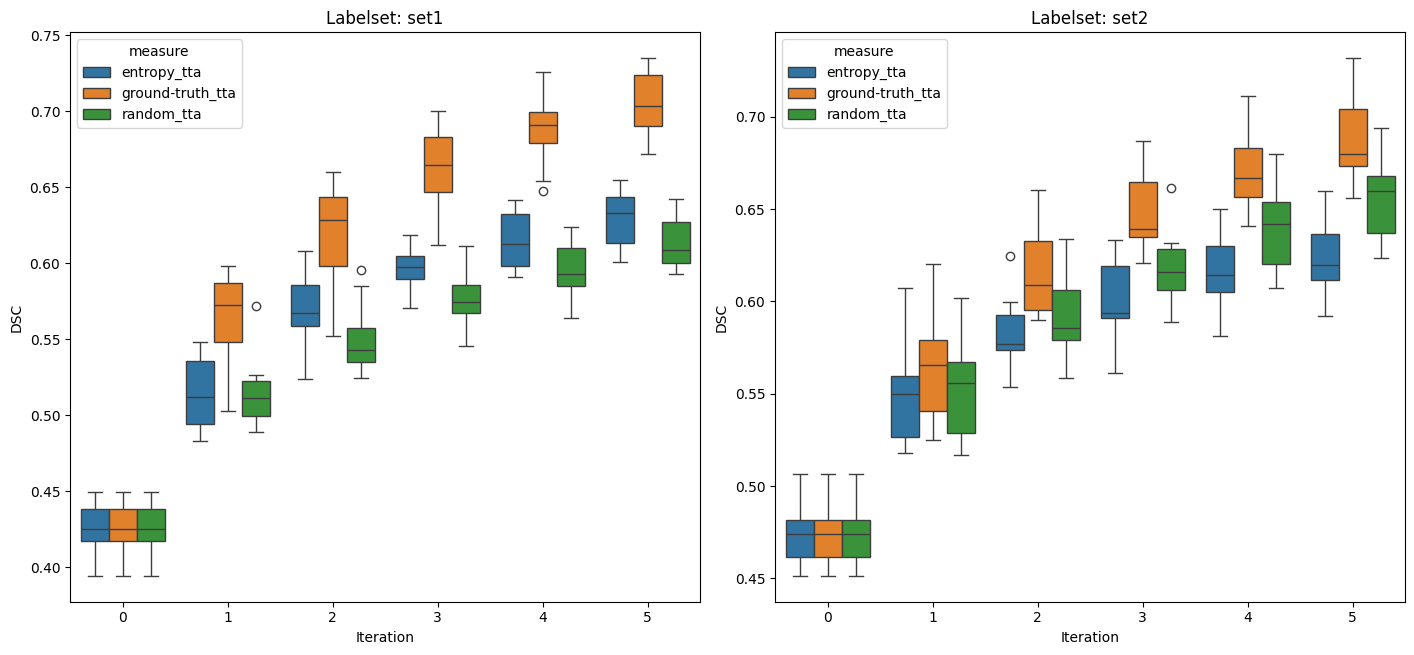

In [157]:
df['uncertainty_measure_feature'] = df['uncertainty_measure'] + '_' + df['feature']

filtered_df = df[
    # (df['iteration'] == 5) & 
    (df['region'] == 'Avg') & 
    (df['score_type'] == 'f1') & 
    (df['iteration'] < 6) &
    (df['feature'].str.contains('tta'))
]



#&('tta' in df['feature'])
# Get unique labelsets
labelsets = filtered_df['labelset'].unique()
print(labelsets)
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(15, 7), sharey=False)

for ax, labelset in zip(axes, labelsets):
    subset = filtered_df[filtered_df['labelset'] == labelset]
    
    # Create boxplot
    sns.boxplot(
        data=subset,
        x='iteration',
        y='score',
        hue='uncertainty_measure_feature',
        ax=ax,
        # errorbar='ci'
    )
    ax.set_title(f'Labelset: {labelset}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('DSC')
    ax.legend(title='measure') #, loc='auto')


# Set common x-axis label
# fig.text(0.5, 0.04, 'Iteration', ha='center')

# Add a legend
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right', title='Background Bias')

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# fig.savefig(f'{data_dir}/experiment2_preliminary.png')

In [159]:
data_dir = '../../results/data/experiment2_debugging'
df = None
# Load data
for file in os.listdir(data_dir):
    if not file.endswith('dir0.csv'):
        continue
    if df is None:
        df = pd.read_csv(f'{data_dir}/{file}')
    else:
        df = pd.concat([df, pd.read_csv(f'{data_dir}/{file}')])

# filtered_df = df[(df['region'] == 'Avg') & (df['score_type'] == 'f1')]
# df = pd.read_csv(f'{data_dir}/709551_set1_entropy_bb-True_default.csv')

In [165]:
df['uncertainty_measure_feature'] = df['uncertainty_measure'] + '_' + df['feature']

filtered_df = df[
    # (df['iteration'] == 5) & 
    (df['region'] == 'SLF_right') & 
    # (df['uncertainty_measure'] == 'entropy') &
    (df['background_bias'] == True) & 
    (df['guidance'] == 'log') & 
    (df['score_type'] == 'f1') & 
    (df['iteration'] < 6)
    # (df['feature'].str.contains('tta'))
]

filtered_df

,iteration,region,score_type,score,subject_id,labelset,uncertainty_measure,background_bias,guidance,feature,bb_flipped_fg_frac,uncertainty_measure_feature
20,0,SLF_right,f1,0.475156,987983,set2,ground-truth,True,log,tta,0.323946,ground-truth_tta
44,1,SLF_right,f1,0.646971,987983,set2,ground-truth,True,log,tta,0.232019,ground-truth_tta
68,2,SLF_right,f1,0.666520,987983,set2,ground-truth,True,log,tta,0.243613,ground-truth_tta
92,3,SLF_right,f1,0.702960,987983,set2,ground-truth,True,log,tta,0.193966,ground-truth_tta
116,4,SLF_right,f1,0.715643,987983,set2,ground-truth,True,log,tta,0.186973,ground-truth_tta
140,5,SLF_right,f1,0.736569,987983,set2,ground-truth,True,log,tta,0.189349,ground-truth_tta
20,0,SLF_right,f1,0.409843,987983,set2,random,True,log,tta,0.358923,random_tta
44,1,SLF_right,f1,0.652871,987983,set2,random,True,log,tta,0.095241,random_tta
68,2,SLF_right,f1,0.727105,987983,set2,random,True,log,tta,0.040027,random_tta
92,3,SLF_right,f1,0.764089,987983,set2,random,True,log,tta,0.016981,random_tta


Text(0.5, 1.0, 'Entropy - no BB - DSC')

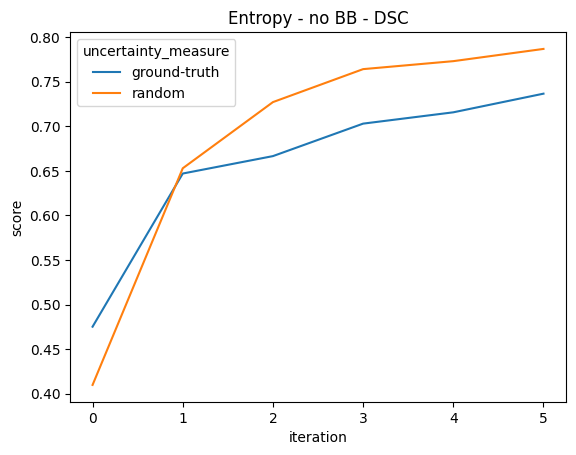

In [166]:
fig = sns.lineplot(
    data=filtered_df,
    x='iteration',
    y='score',
    hue='uncertainty_measure',

    # errorbar='ci'
)
plt.title('Entropy - no BB - DSC')
# plt.savefig(f'{data_dir}/swt2_bb-f1.png')

In [ ]:
df['uncertainty_measure_feature'] = df['uncertainty_measure'] + '_' + df['feature']

# filtered_df = df[
#     (df['iteration'] == 5) & 
#     # (df['region'] == 'Avg') & 
#     (df['score_type'] == 'f1') & 
#     (df['iteration'] < 6) &
#     (df['feature'].str.contains('tta'))
# ]


filtered_df = df[
    # (df['iteration'] == 5) & 
    # (df['region'] == 'Avg') & 
    (df['subject_id'] == 987983) &
    (df['score_type'] == 'f1') & 
    (df['iteration'] == 1) &
    (df['feature'].str.contains('tta')) 
    # (df['labelset'] == 'set2')
]
#&('tta' in df['feature'])
# Get unique labelsets
labelsets = filtered_df['labelset'].unique()
print(labelsets)
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(labelsets), figsize=(15, 7), sharey=False)

for ax, labelset in zip(axes, labelsets):
    subset = filtered_df[filtered_df['labelset'] == labelset]
    
    # Create boxplot
    sns.lineplot(
        data=subset,
        x='region',
        y='score',
        hue='uncertainty_measure_feature',
        ax=ax,
        # errorbar='ci'
    )
    ax.set_title(f'Labelset: {labelset}')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('DSC')
    ax.legend(title='measure') #, loc='auto')


# Set common x-axis label
# fig.text(0.5, 0.04, 'Iteration', ha='center')

# Add a legend
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper right', title='Background Bias')

# Adjust layout
plt.tight_layout(rect=[0.05, 0.05, 1, 1])

# fig.savefig(f'{data_dir}/experiment2_set2.png')

In [148]:
import torch

dims    = 1 # len(volume.shape)
indices = torch.arange(dims)
sums    = torch.zeros((dims, 145))

volume = torch.ones(145,145,145)
# for each direction, sum values in each slice
for dim in range(dims):
    axis       = tuple(indices[indices != dim])
    slice_sums = volume.sum(axis=axis)
    sums[dim]  = slice_sums
print(sums.shape)

torch.Size([1, 145])
